Compy and tunepy modules are testing with a smaller size of web scraping here (5,200 car information), and hyperparameter tuning is not actually tuning the model.  The purpose here is just to see compy.py and tunepy.py work.

In [1]:
# pandas and sqlalchmey are for checking dataframe before database table updating from current web scraping
import pandas as pd
from sqlalchemy import create_engine

# The modules below are used for the pipline to work
from compy import get_car_urls, get_car_city_urls, get_features, complete_make, simplify_drivetrain, simplify_fuel_type, simplify_transmission, simplify_engine, pipeline
from tunepy import get_best_param, scores_with_best_param

In [2]:
# Existing data in the database
engine = create_engine('sqlite:///test.db')
df = pd.read_sql('SELECT * FROM test;', engine)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  69 non-null     object
 1   price                 69 non-null     int64 
 2   mpg                   69 non-null     int64 
 3   mileage               69 non-null     int64 
 4   num_of_entertainment  69 non-null     int64 
 5   num_of_safety         69 non-null     int64 
 6   year                  69 non-null     int64 
 7   drivetrain            69 non-null     object
 8   fuel_type             69 non-null     object
 9   transmission          69 non-null     object
 10  engine                69 non-null     object
 11  make                  69 non-null     object
 12  model                 69 non-null     object
dtypes: int64(6), object(7)
memory usage: 7.1+ KB


100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
DATA FROM WEB SCRAPING:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2229 entries, 0 to 2228
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  2229 non-null   object
 1   price                 2229 non-null   object
 2   mpg                   2067 non-null   object
 3   mileage               2229 non-null   object
 4   drivetrain            2229 non-null   object
 5   fuel_type             2229 non-null   object
 6   transmission          2229 non-null   object
 7   engine                2229 non-null   object
 8   num_of_entertainment  2180 non-null   object
 9   num_of_safety         2092 non-null   object
dtypes: object(10)
memo

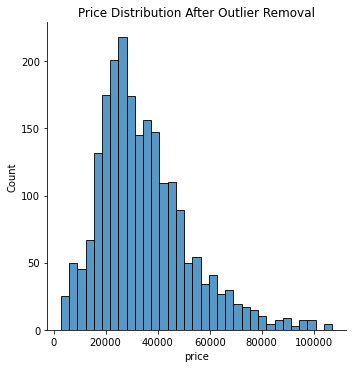

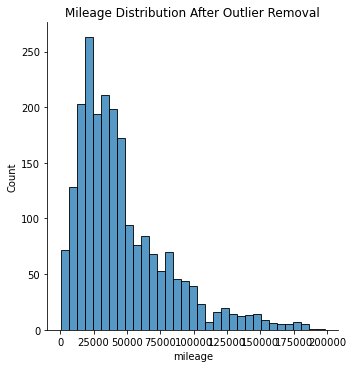

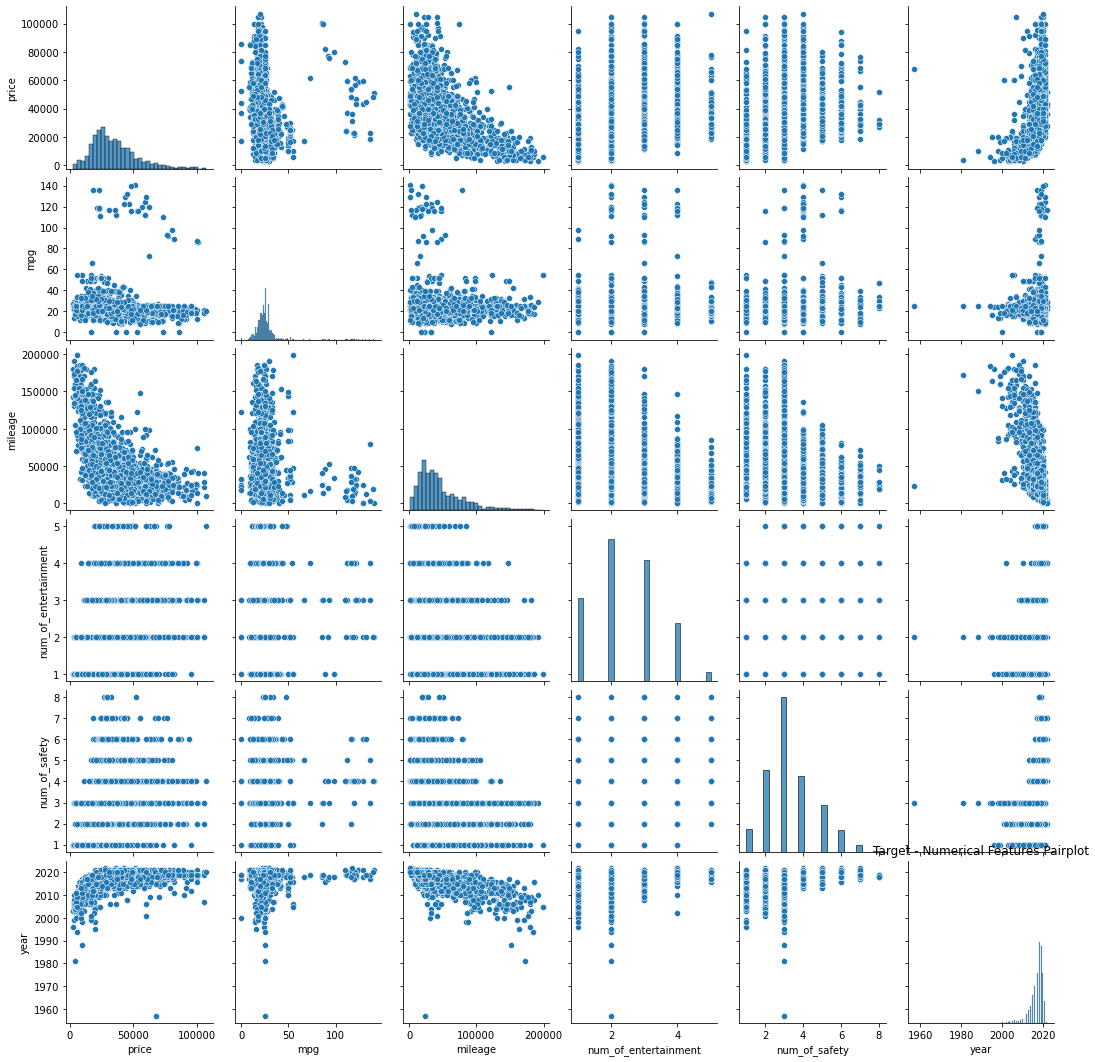

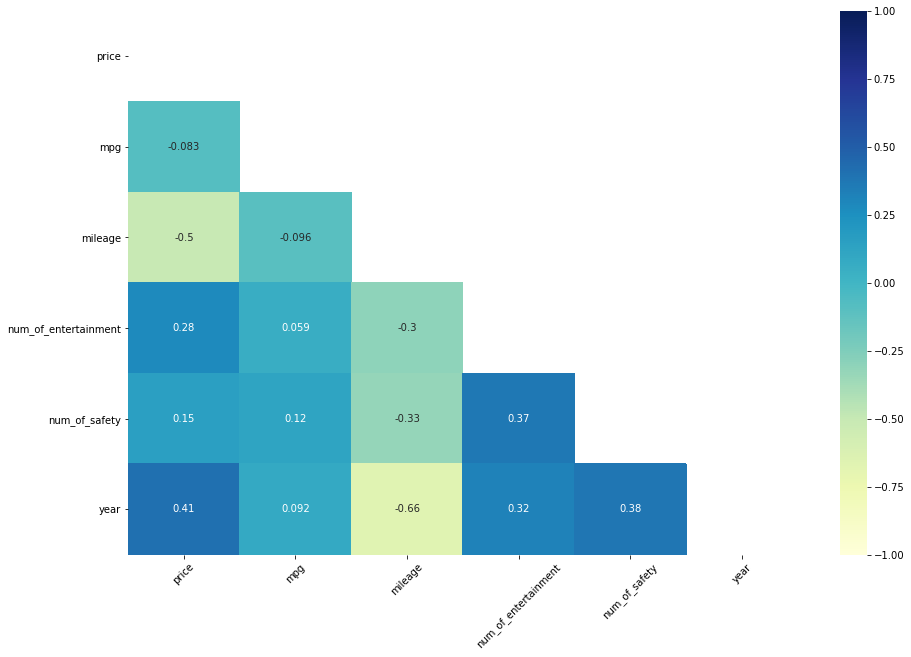

In [3]:
# Web scraping, data cleaning, and data updating
pipeline(13, [78704, 90001, 94114, 97214])

In [9]:
# Get best hyperparameters for the model
get_best_param(n_estimators = [10000], 
               max_depth = [None, 30, 100, 200, 300, 400],
               min_samples_split = [2, 5, 10, 15],
               max_features = ['auto', 'log2'])

Best params:  {'max_depth': 400, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 10000}
Best estimator:  RandomForestRegressor(max_depth=400, max_features='log2', n_estimators=10000)
Best score:  0.7363910681077778


In [11]:
# Scores of model after hyperparameter tuning
scores_with_best_param(n_estimators = 10000, 
                       max_depth = 400, 
                       min_samples_split = 2, 
                       max_features = 'log2')

Train R^2: 0.969
Validation R^2: 0.792
Test R^2: 0.746
MAE: 5963.409
